<a href="https://colab.research.google.com/github/vishanth10/vish/blob/master/Center_of_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***Work By : Vishanth Hari Raj Balasubramanian***


The dataset provided includes time-series data tracking sustainability metrics, economic developments, and the prosperity of 173 countries over the past years.
Your task is to analyze this dataset and generate three graphs to provide insights for our business clients (feel free to include more if you find them necessary):

Q1. Create a graph showing the ratios of women in national parliaments across different income-level country categories in 2018.

Hint: Use column (Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS) and (Income Classification (World Bank Definition)
Use any graph of your choice that best conveys your insight.
Provide a one-sentence summary of your findings


Q.2 Calculate production-based CO2 per capita and compare it with GDP per capita. Provide insights of your choice categorized by world region for 2018.

Hint: Use column (Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes), (population), and (GDP per capita (current US$) - NY.GDP.PCAP.CD)
Use any graph of your choice that best conveys your insight.
Provide a one-sentence summary of your findings


Q.3 Our client from Canada is interested in understanding Canada's sustainability performance compared to the rest of the world. Create a graph using a metric of your choice to show this comparison.

Use any graph of your choice that best conveys your insight.
Provide a one-sentence summary of your findings


In [4]:
from google.colab import files
from google.colab import files
uploaded = files.upload()
import io


Saving WorldSustainabilityDataset.csv to WorldSustainabilityDataset.csv


Create a graph showing the ratios of women in national parliaments across different income-level country categories in 2018.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv("WorldSustainabilityDataset.csv")

data.describe()
data.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [38]:
# Extract columns and drop null values

women_parliaments = data[data['Year'] == 2018][['Country Code', 'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS', 'Income Classification (World Bank Definition)']]
women_parliaments.dropna(subset=['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS', 'Income Classification (World Bank Definition)'], inplace=True)

#print(women_parliaments)

In [43]:
# Group by income level and calculate the mean proportion of women in parliaments and printing it.

women_parliaments_grouped = round(women_parliaments.groupby('Income Classification (World Bank Definition)').mean(), 2)
women_parliaments_grouped = women_parliaments_grouped.sort_values('Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS', ascending=False)

print(women_parliaments_grouped)

                                               Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS
Income Classification (World Bank Definition)                                                                                
High income                                                                                24.98                             
Upper-middle income                                                                        23.29                             
Low income                                                                                 21.46                             
Lower-middle income                                                                        19.47                             


<ipython-input-43-7ba4e4ade7dc>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [44]:
import plotly.graph_objs as go
import plotly.io as pio

colors = ['blue', 'green', 'red', 'orange']
# Define the data trace for Plotly
trace = go.Bar(
    x=women_parliaments_grouped.index,
    y=women_parliaments_grouped['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS'],
    marker=dict(color=colors),
    text=women_parliaments_grouped['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS'],  # Text to display on hover
    textposition='auto',
)

layout = go.Layout(
    title='Ratios of Women in National Parliaments by Income Level (2018)',
    xaxis=dict(title='Income Classification'),
    yaxis=dict(title='Proportion of seats held by women (%)'),
    bargap=0.4,
)

# Create the figure and display it
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot using Plotly
pio.show(fig)




OBSERVATION:

From thw Graph we can observe that:

**As the Income range decreases we can see the change decrease in proportion of seats held by women.**

In High Income classification - there is 25% of the seat help by women, which is relatively high compared to all other classes.

In [46]:

data_2018 = data[data['Year'] == 2018][['Country Code', 'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
                                         'GDP per capita (current US$) - NY.GDP.PCAP.CD', 'Population, total - SP.POP.TOTL', 'World Regions (UN SDG Definition)']]

# Drop rows with null values in necessary columns
data_2018.dropna(subset=['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
                          'GDP per capita (current US$) - NY.GDP.PCAP.CD', 'Population, total - SP.POP.TOTL', 'World Regions (UN SDG Definition)'], inplace=True)

# Calculate CO2 per capita and GDP per capita
data_2018['CO2 per capita'] = data_2018['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes'] / data_2018['Population, total - SP.POP.TOTL']
data_2018['GDP per capita'] = data_2018['GDP per capita (current US$) - NY.GDP.PCAP.CD']

# Drop rows where population is zero to avoid division by zero
data_2018 = data_2018[data_2018['Population, total - SP.POP.TOTL'] != 0]

# Group by world region and calculate mean CO2 per capita and GDP per capita
grouped_data = data_2018.groupby('World Regions (UN SDG Definition)').mean()

#print(grouped_data)



<ipython-input-46-316262021130>:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



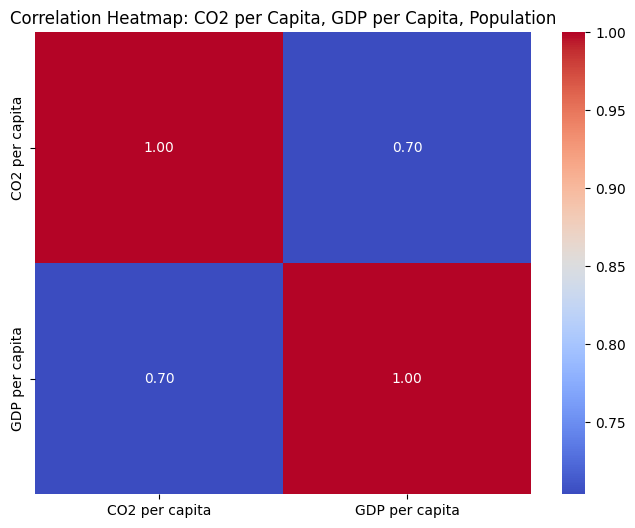

In [12]:
import seaborn as sns

heatmap_data = grouped_data[['CO2 per capita', 'GDP per capita']]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: CO2 per Capita, GDP per Capita, Population')
plt.show()

#correlation between the variable to detect the effect of CO2 and GDP to find the relationship between them

Correlation Matrix to observe the relationship: - We can notice the clear correlation exist between GDP per Capita vs CO2 per capita, Now we can visual see in below graphs

In [13]:
import plotly.express as px

# Assuming 'grouped_data' contains the grouped mean values of CO2 per capita, GDP per capita, and population
# Replace with your data or load the previously calculated 'grouped_data'

# Plotting line graphs using Plotly Express
fig = px.scatter(grouped_data, x='GDP per capita', y='CO2 per capita', size='Population, total - SP.POP.TOTL',
                 hover_name=grouped_data.index, color=grouped_data.index,
                 labels={'GDP per capita': 'GDP per capita (current US$)', 'CO2 per capita': 'CO2 emissions per capita (million tonnes)'},
                 title='Production-based CO2 per Capita vs GDP per Capita by World Region (2018)',
                 size_max=50)

# Update layout for better presentation
fig.update_layout(
    xaxis=dict(title='GDP per capita (current US$)'),
    yaxis=dict(title='CO2 emissions per capita (million tonnes)'),
    showlegend=False
)
fig.show()

Above scatter population plot Features:-

- Size represent the Population of each region
- Color represent each different World region
- Layover on bubble which give all details regarding it.

OBSERVATION:

We could observe some relationship CO2 per capita and GDP per capita, along with size of population


North Africa and Western Asia has the highest CO2 emission per capita, whereas GDP is not high enough.

In [47]:
renewable_output_data = data[['Country Code', 'Country Name', 'Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS']]

#dropNA values
renewable_output_data.dropna(subset=['Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS'], inplace=True)

#print(renewable_output_data)

<ipython-input-47-458bce4b0801>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
import plotly.graph_objs as go

world_map = go.Figure(go.Choropleth(
    locations=data['Country Code'],
    z=data['Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS'],
    text=data['Country Name'],
    colorscale='Viridis',
    marker_line_color='White',
    colorbar=dict(title='Renewable Electricity Output (%)')
))

world_map.update_layout(
    title='Renewable Electricity Output (% of total electricity output) by Country',
    geo=dict(
        showframe= True,
        projection=dict(type='natural earth')  #mercator
    )
)


Here Shows the World Map: Color division represent the percentage of Renewable Electricity out. We can Compare the Green color of Canada with the rest of the world on color scale, where yellow has highest percentage of Renewable electricity outlet followed by Green

OBSERVATION:

Comparing the Green color of Canada with the rest of the world on color scale, where yellow has highest percentage of Renewable electricity outlet mainly central africa and Scandinavian countries


--- VISHANTH HARI RAJ BALASUBRAMANIAN ----